# Predictive Model for Predicting Loan Repayment
* Business Objective
* Data Collection and Understanding
* Exploratory Data Analysis
* Data Preparation
* Predictive Modeling
* Testing and Evaluation
* Deployment

## 1. Business Objective: 
* A financial institution wants to identify customer who have a lesser chance of defaulting on the loan. 
* We need to build a predictive model that would predict who would be a good customer for them and come up with questions to ask the client when they are applying for loan based on the model.

## 2. Data Collection and Understanding:

In [1]:
# Read in the dataset
import pandas as pd
import numpy as np
import pandas_profiling
loan = pd.read_csv('LoansTrainingSet.csv')

/Users/cloris1022/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Overview for the dataset and variables
pandas_profiling.ProfileReport(loan)

Number of variables,19
Number of observations,256984
Total Missing (%),5.6%
Total size in memory,37.3 MiB
Average record size in memory,152.0 B
Numeric,10
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [3]:
# Then look at a sample of  5 rows of the dataset
loan.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
51725,3373ff29-5e75-4085-be15-66254064f9f3,0739ab6d-b3ed-46cb-9757-238539614ac4,Fully Paid,7692,Short Term,696.0,3 years,Rent,24653.0,Debt Consolidation,$252.69,13.9,NaN,7,0,15075,23158,0.0,0.0
193380,c050e40b-7f34-4f86-8fc1-3e80712e556a,2c5a7451-aad5-4682-9876-0c3a39ffcf94,Charged Off,11529,Short Term,7360.0,5 years,Home Mortgage,176387.0,Home Improvements,"$1,807.96",29.4,68.0,9,5,2627,3545,3.0,2.0
35861,23bcd6e3-bdd8-406f-91e3-3265ef0fa919,4abb6286-cc49-4a75-bd45-db7e7002e09d,Fully Paid,13117,Short Term,NaN,10+ years,Home Mortgage,NaN,Debt Consolidation,$765.15,14.9,57.0,10,0,14224,19274,0.0,0.0
178596,b181a353-fdc2-4607-89c3-b2473d817884,5eaf60ff-a0d8-415e-b90b-190e090c9f49,Fully Paid,24581,Short Term,748.0,10+ years,Home Mortgage,137243.0,Debt Consolidation,"$1,738.41",14.1,NaN,19,0,5458,124045,0.0,0.0
184508,b7739bef-d20d-4cb6-bace-4f534f8b30d0,1e58896b-56ef-43f9-b133-901c4999a7f5,Charged Off,4675,Short Term,7150.0,2 years,Rent,29529.0,Debt Consolidation,$516.76,17.5,NaN,10,1,3248,7092,1.0,0.0


#### Data Dictionary:
* Loan ID: A unique Identifier for the loan information.
* Customer ID: A unique identifier for the customer. Customers may have more than one loan.
* Loan Status: A categorical variable indicating if the loan was paid back or defaulted.
* Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.
* Term: A categorical variable indicating if it is a short term or long term loan.
* Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.
* Years in current job: A categorical variable indicating how many years the customer has been in their current job.
* Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage
* Annual Income: The customer's annual income
* Purpose: A description of the purpose of the loan.
* Monthly Debt: The customer's monthly payment for their existing loans
* Years of Credit History: The years since the first entry in the customer’s credit history 
* Months since last delinquent: Months since the last loan delinquent payment
* Number of Open Accounts: The total number of open credit cards
* Number of Credit Problems: The number of credit problems in the customer records.
* Current Credit Balance: The current total debt for the customer
* Maximum Open Credit: The maximum credit limit for all credit sources
* Bankruptcies: The number of bankruptcies
* Tax Liens: The number of tax liens

In [4]:
# Look at the information for the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [5]:
# Check number of missing values for the dataset
loan.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [6]:
# Check duplicates in the dataset
loan.duplicated().sum()

16610

## 3. Exploratory Data Analysis:
* Univariate visualization and summary statistics for each field in the raw dataset
* Bivariate visualization and summary statistics for assessing the relationship between each variable in the dataset and the target variable
* Multivariate visualizations to understand interactions between different fields in the data
* Feature Engineering: use domain knowledge to create additional relevant features from the existing raw features in the data, and to increase the predictive power of the learning algorithm

In [7]:
# Import python modules for visualization
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
seaborn.set_style('whitegrid')

### 3.1 Univariate Analysis

#### 3.1.1 Numerical variables

In [8]:
# Summary for numerical variables
loan.describe(include=['int64','float64'])

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


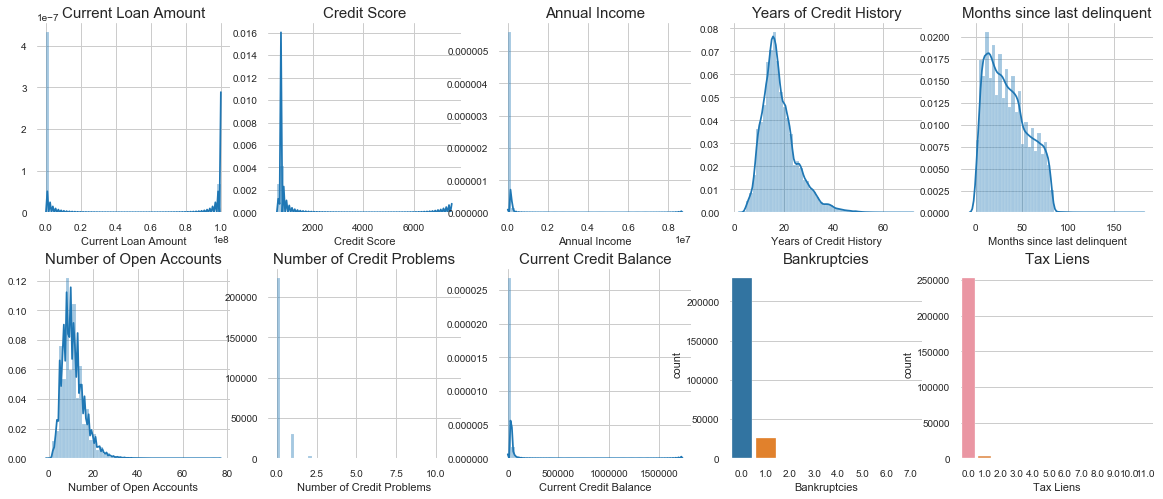

In [9]:
fig, axarr = plt.subplots(2, 5, figsize=(20, 8))

seaborn.distplot(loan['Current Loan Amount'], ax=axarr[0][0])
axarr[0][0].set_title("Current Loan Amount", fontsize=15)

seaborn.distplot(loan['Credit Score'].dropna(), ax=axarr[0][1])
axarr[0][1].set_title("Credit Score", fontsize=15)

seaborn.distplot(loan['Annual Income'].dropna(), ax=axarr[0][2])
axarr[0][2].set_title("Annual Income", fontsize=15)

seaborn.distplot(loan['Years of Credit History'], ax=axarr[0][3])
axarr[0][3].set_title("Years of Credit History", fontsize=15)

seaborn.distplot(loan['Months since last delinquent'].dropna(), ax=axarr[0][4])
axarr[0][4].set_title("Months since last delinquent", fontsize=15)

seaborn.distplot(loan['Number of Open Accounts'].dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Number of Open Accounts", fontsize=15)

seaborn.distplot(loan['Number of Credit Problems'],kde=False, ax=axarr[1][1])
axarr[1][1].set_title("Number of Credit Problems", fontsize=15)

seaborn.distplot(loan['Current Credit Balance'], ax=axarr[1][2])
axarr[1][2].set_title("Current Credit Balance", fontsize=15)

seaborn.countplot(loan.Bankruptcies, ax=axarr[1][3])
axarr[1][3].set_title("Bankruptcies", fontsize=15)

seaborn.countplot(loan['Tax Liens'], ax=axarr[1][4])
axarr[1][4].set_title("Tax Liens", fontsize=15)

plt.subplots_adjust(hspace=.3)

seaborn.despine()

Findings for the numerical variables:
* Normalization needed for loan amount.
* Correction needed for incorrect input: credit score should not be bigger than 900.
* Normalization needed for annual income.
* Normalization needed for credit balance.

#### 3.1.2 Categorical variables

In [10]:
# Summary for categorical variables
loan.describe(include='object')

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
count,256984,256984,256984,256984,245508,256984,256984,256984,256984
unique,215700,215700,2,2,11,4,10,129115,87188
top,e70c9e2f-ff78-4826-b732-aa2d67dc07fc,ef8604f5-79d0-40bc-80fa-78edc88ef1aa,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,$0.00,0
freq,4,4,176191,192632,78896,124477,203911,254,1597


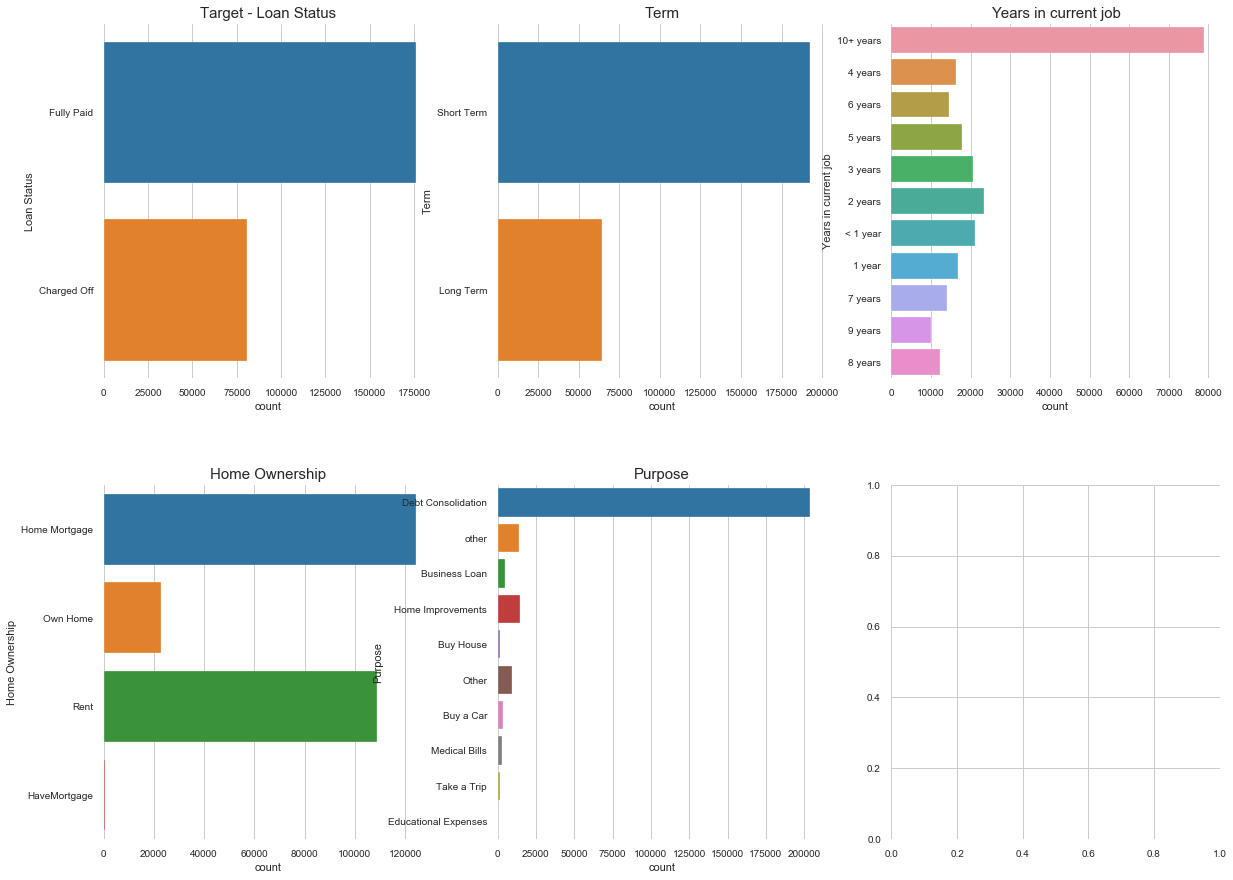

In [11]:
fig, axarr = plt.subplots(2, 3, figsize=(20, 15))

seaborn.countplot(y=loan['Loan Status'], ax=axarr[0][0])
axarr[0][0].set_title("Target - Loan Status", fontsize=15)

seaborn.countplot(y=loan['Term'], ax=axarr[0][1])
axarr[0][1].set_title("Term", fontsize=15)

seaborn.countplot(y=loan['Years in current job'], ax=axarr[0][2])
axarr[0][2].set_title("Years in current job", fontsize=15)

seaborn.countplot(y=loan['Home Ownership'], ax=axarr[1][0])
axarr[1][0].set_title("Home Ownership", fontsize=15)

seaborn.countplot(y=loan['Purpose'], ax=axarr[1][1])
axarr[1][1].set_title("Purpose", fontsize=15)

plt.subplots_adjust(hspace=.3)

seaborn.despine()

Findings for the above categorical variables:
* Encode this 'Loan Status' to 0 and 1.
* Home ownership: 'HaveMortgage' should be merged with 'Home Mortgage'.
* Purpose: 'other' should be merged with 'Other'

In [12]:
# Monthly Debt: first reformat by removing the dollar sign and comma, and converting to numerical
loan['Monthly Debt'] = loan['Monthly Debt'].str.replace(',','').apply(lambda x: x.strip('$')).astype(float)
loan['Monthly Debt'].describe()

count    256984.000000
mean        963.310424
std         634.119410
min           0.000000
25%         531.992500
50%         844.520000
75%        1252.452500
max       22939.120000
Name: Monthly Debt, dtype: float64

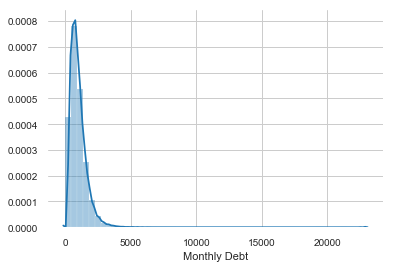

In [13]:
seaborn.distplot(loan['Monthly Debt'])

Need to standardize the Monthly Debt.

In [14]:
# Max Open Credit: first replace the '#VALUE!' to convert the variable to numerical
loan["Maximum Open Credit"] = loan["Maximum Open Credit"].replace('#VALUE!',np.nan)
loan["Maximum Open Credit"] = loan["Maximum Open Credit"].dropna().astype('int')
loan["Maximum Open Credit"].describe()

count    2.569800e+05
mean     3.572350e+04
std      5.550080e+05
min      0.000000e+00
25%      1.277800e+04
50%      2.174000e+04
75%      3.617125e+04
max      1.763322e+08
Name: Maximum Open Credit, dtype: float64

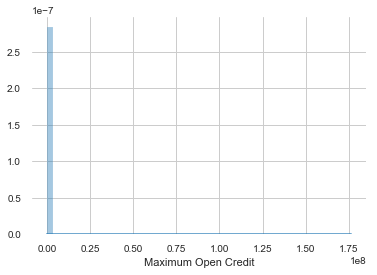

In [15]:
seaborn.distplot(loan['Maximum Open Credit'].dropna())

Need to standardiz the maximum open credit limit.

### 3.2 Feature Engineering

#### 3.2.1 Normalize the numerical variables by taking natural log

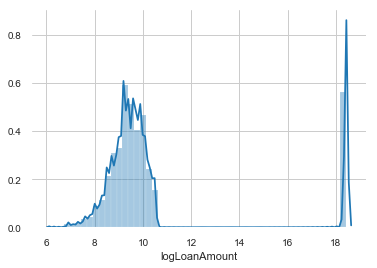

In [16]:
# Current loan amount - taking natural logs
loan['logLoanAmount'] = np.log(loan['Current Loan Amount'])
seaborn.distplot(loan['logLoanAmount'])

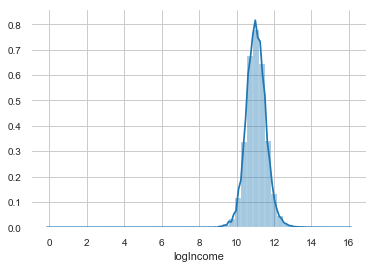

In [17]:
# Feature engineering for Loan amount: taking natural log
loan['logIncome'] = np.log(loan['Annual Income']+1)
seaborn.distplot(loan['logIncome'].dropna())

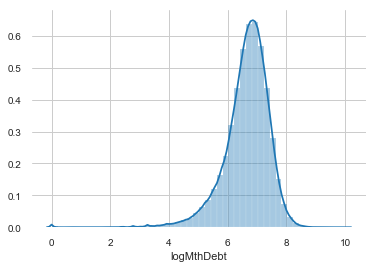

In [18]:
# Feature engineering for Monthly Debt: taking natural log
loan['logMthDebt'] = np.log(loan['Monthly Debt']+1)
seaborn.distplot(loan['logMthDebt'])

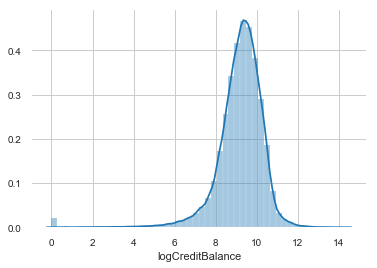

In [19]:
# Feature engineering for Credit Balance: taking natural log
loan['logCreditBalance'] = np.log(loan['Current Credit Balance']+1)
seaborn.distplot(loan['logCreditBalance'])

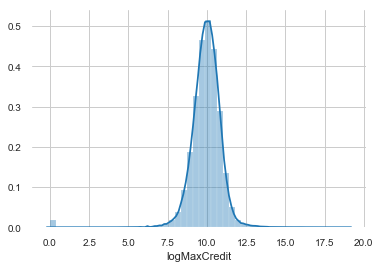

In [20]:
# Feature engineering for Maximum open credit: taking natural log
loan['logMaxCredit'] = np.log(loan['Maximum Open Credit']+1)
seaborn.distplot(loan['logMaxCredit'].dropna())

#### 3.2.2 Correction and Re-categorization

In [21]:
# Loan Status: Encode to 0 and 1
def encode_status(status):
    if status == 'Fully Paid':
        return 1
    elif status == 'Charged Off':
        return 0

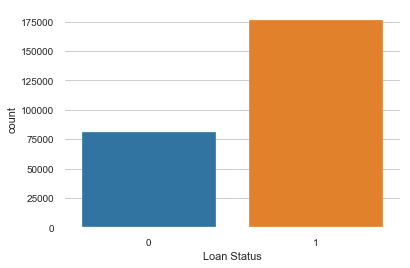

In [22]:
loan['Loan Status'] = loan['Loan Status'].apply(encode_status)
seaborn.countplot(loan['Loan Status'])

In [23]:
# Correction for Credit score
loan[loan['Credit Score']>900]['Credit Score'].describe()

count    16187.000000
mean      7104.207698
std        312.341012
min       5850.000000
25%       6940.000000
50%       7190.000000
75%       7350.000000
max       7510.000000
Name: Credit Score, dtype: float64

Seems there's a typo error in inputing the credit scores: added one extra 0, which needs to be corrected.

In [24]:
# Correction on Credit Score:
def correct_creditscore(score):
    if score > 900:
        score = score / 10
    else:
        return score

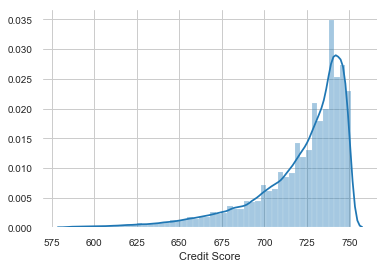

In [25]:
loan['Credit Score'] = loan['Credit Score'].apply(correct_creditscore)
seaborn.distplot(loan['Credit Score'].dropna())

In [26]:
# Feature Engineering for Credit Score: Binning into FICO Credit Score Ranges
# def FICO_range(score):
#     if score >= 300 and score <= 579:
#         return 'Poor'
#     elif score >= 580 and score <= 669:
#         return 'Fair'
#     elif score >= 670 and score <= 739:
#         return 'Good'
#     elif score >= 740 and score <= 799:
#         return 'Very Good'
#     elif score >= 800:
#         return 'Excellent'

In [27]:
# Correction on Home ownership
def merge_ownership(ownertype):
    if ownertype == 'HaveMortgage':
        return 'Home Mortgage'
    else:
        return ownertype

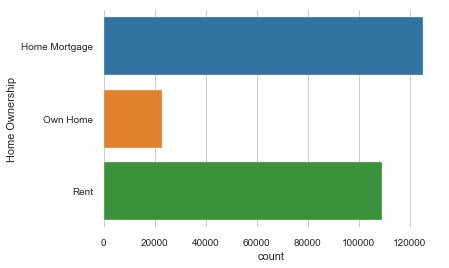

In [28]:
loan['Home Ownership'] = loan['Home Ownership'].apply(merge_ownership)
seaborn.countplot(y='Home Ownership', data=loan)

In [29]:
# Correction on Purpose
def merge_purpose(purpose):
    if purpose == 'other':
        return 'Other'
    else:
        return purpose

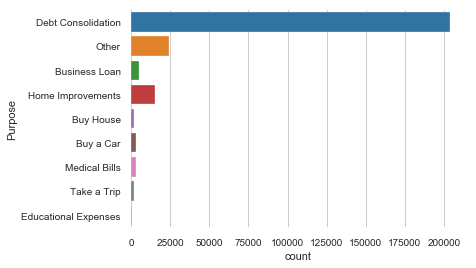

In [30]:
loan.Purpose = loan.Purpose.apply(merge_purpose)
seaborn.countplot(y='Purpose', data=loan)

After univariate analysis and feature engineering:

In [31]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 24 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null int64
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    179121 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null float64
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

### 3.3 Bivariate and Multivariate Analysis

#### 3.3.1 Bivariate Analysis using pairplot and correlation/heatmap

/Users/cloris1022/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/cloris1022/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/cloris1022/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/cloris1022/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


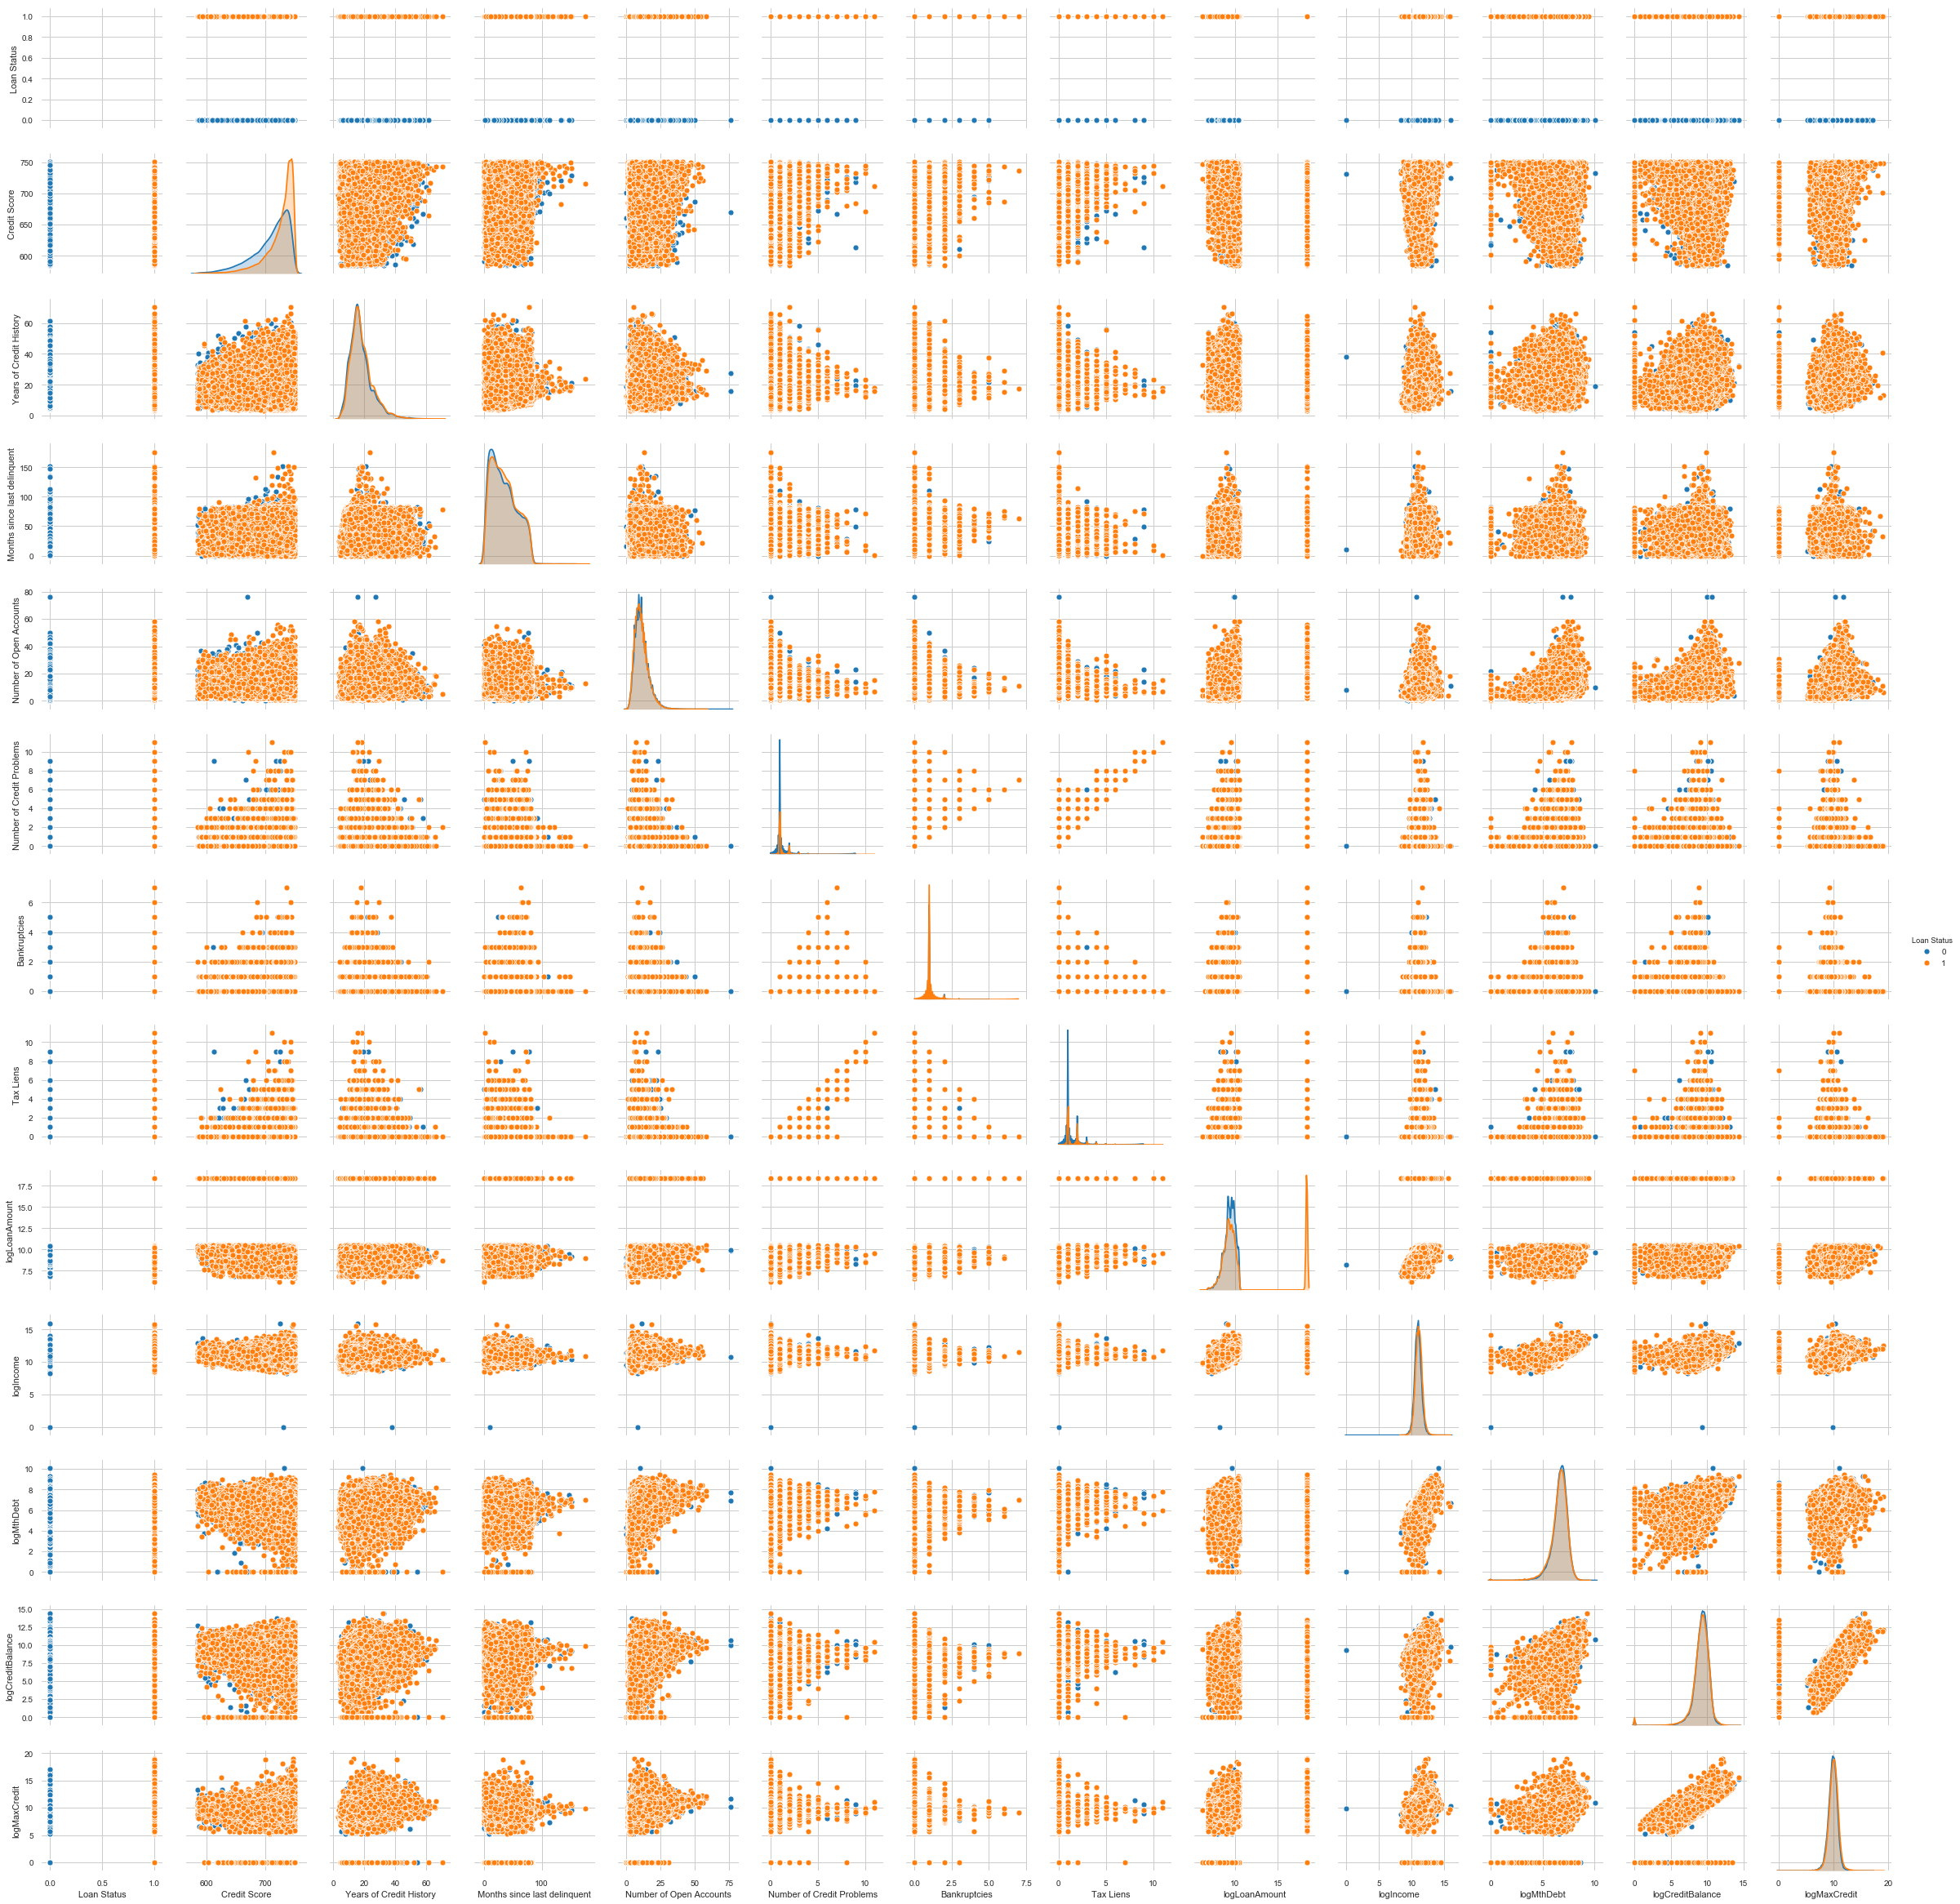

In [32]:
# Bivariate relationship using pair plot
coldrop = ['Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit']
seaborn.pairplot(loan.drop(columns=coldrop),hue='Loan Status')

In [33]:
# Correlation matrix
loan.drop(columns=coldrop).corr()

,Loan Status,Credit Score,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens,logLoanAmount,logIncome,logMthDebt,logCreditBalance,logMaxCredit
Loan Status,1.000000,0.257087,0.035548,0.023541,-0.020787,-0.010179,0.001154,-0.012585,0.251158,0.108006,-0.027629,-0.013939,0.044604
Credit Score,0.257087,1.000000,0.084003,0.046313,-0.041658,-0.061676,-0.046905,-0.028362,0.042172,0.015454,-0.090744,-0.027870,0.087131
Years of Credit History,0.035548,0.084003,1.000000,-0.039695,0.128033,0.061251,0.062049,0.020915,0.038914,0.216248,0.161643,0.178859,0.189897
Months since last delinquent,0.023541,0.046313,-0.039695,1.000000,-0.035803,0.088612,0.112907,0.002730,-0.002339,-0.079130,-0.043397,0.011835,-0.003397
Number of Open Accounts,-0.020787,-0.041658,0.128033,-0.035803,1.000000,-0.013731,-0.022805,0.005754,0.034103,0.233944,0.416396,0.308921,0.370235
Number of Credit Problems,-0.010179,-0.061676,0.061251,0.088612,-0.013731,1.000000,0.755866,0.584917,-0.011697,-0.017402,-0.038771,-0.110450,-0.086556
Bankruptcies,0.001154,-0.046905,0.062049,0.112907,-0.022805,0.755866,1.000000,0.046160,-0.011333,-0.056463,-0.058232,-0.119634,-0.094093
Tax Liens,-0.012585,-0.028362,0.020915,0.002730,0.005754,0.584917,0.046160,1.000000,-0.000911,0.046379,0.016966,-0.014022,-0.009917
logLoanAmount,0.251158,0.042172,0.038914,-0.002339,0.034103,-0.011697,-0.011333,-0.000911,1.000000,0.109794,0.066106,0.061670,0.069498
logIncome,0.108006,0.015454,0.216248,-0.079130,0.233944,-0.017402,-0.056463,0.046379,0.109794,1.000000,0.534435,0.291510,0.281925


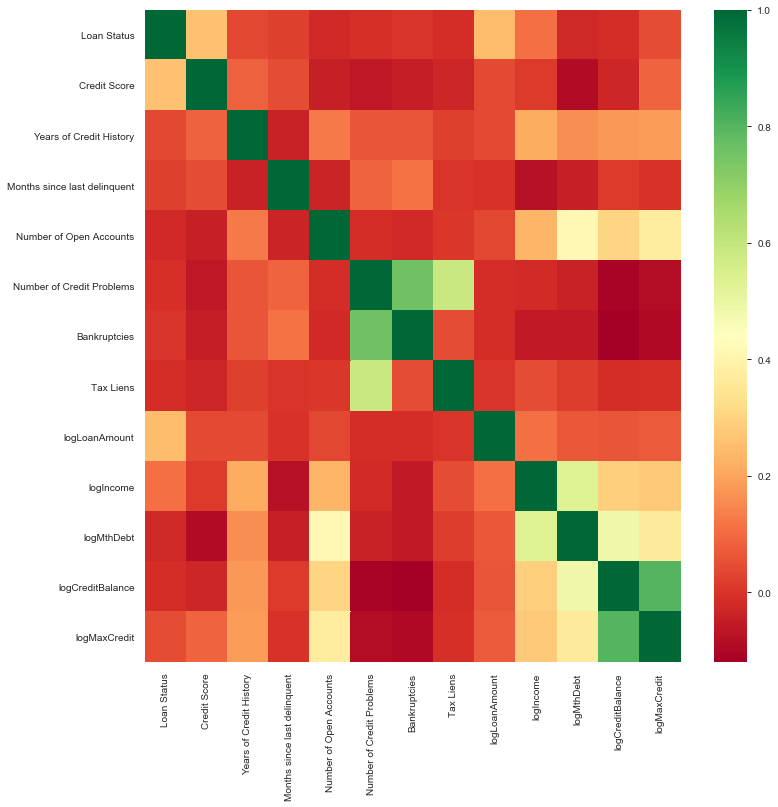

In [34]:
# Heatmap for correlation
plt.figure(figsize=(12,12))
seaborn.heatmap(loan.drop(columns=coldrop).corr(),cmap='RdYlGn')

From the correlation matrix and heatmap, we can see logCreditBalance and logMaxCredit are highly correlated, but none significantly correlated with the Loan Status.

#### 3.3.2 Bivariate relationship with the target variable

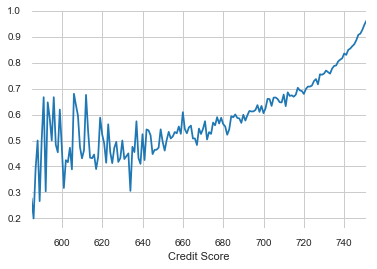

In [35]:
# Credit score vs Loan status
loan.groupby(['Credit Score'])['Loan Status'].mean().plot.line()
plt.show()

The higher the credit score, the higher probability the customer will pay off the loan.

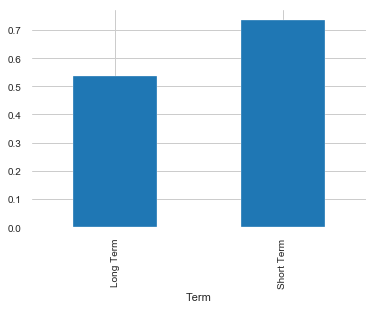

In [36]:
# Term vs Loan status
loan.groupby(['Term'])['Loan Status'].mean().plot.bar()
plt.show()

Short term loan is more likely to be paid off than long term loan.

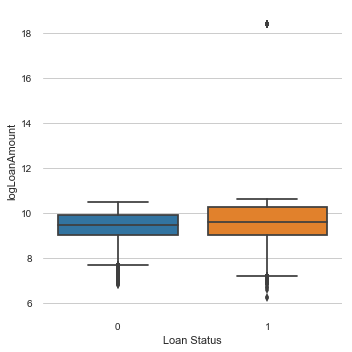

In [37]:
# Loan amount vs Loan status
seaborn.catplot(x='Loan Status', y='logLoanAmount', kind='box', data=loan)

People who paid off have higher and wider spread of loan amount.

#### 3.3.3 Multivariate relationship among variables

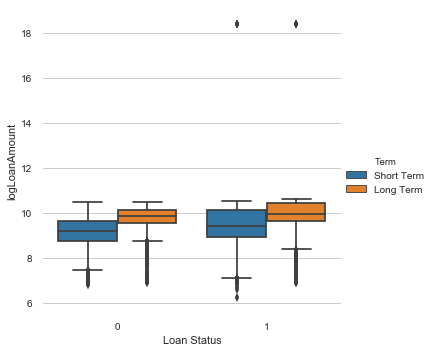

In [38]:
# Loan Status / Current Loan Amount (log) / Term
seaborn.catplot(x='Loan Status', y='logLoanAmount', hue='Term', kind='box', data=loan)

People who paid off have higher and wider spread of loan amount; Long term loan has higher loan amount than short term loan.

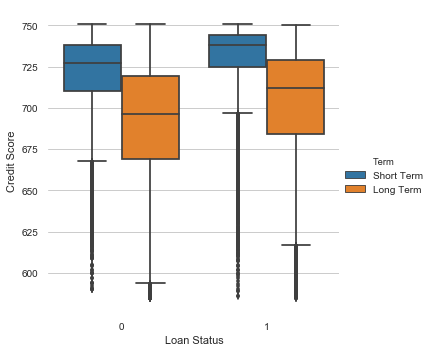

In [39]:
# Loan Status / Current Loan Amount (log) / Term
seaborn.catplot(x='Loan Status', y='Credit Score', hue='Term', kind='box', data=loan)

People who paid off have higher credit score; Long term loan borrowers have higher credit score than short term loan borrowers.

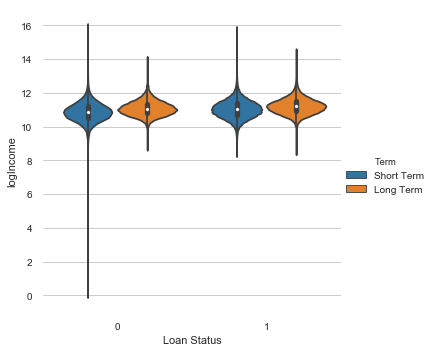

In [40]:
# Loan Status / Annual Income (log) / Term
seaborn.catplot(x='Loan Status', y='logIncome', hue='Term', kind='violin', data=loan)

People who paid off have higher annual income; Long term loan borrowers have higher annual income than short term loan borrowers.

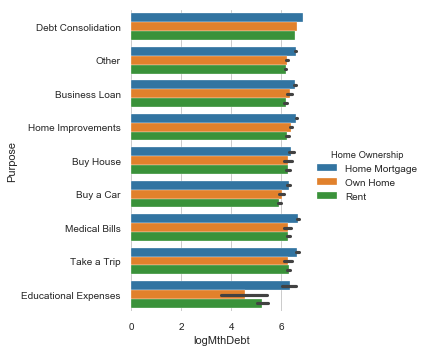

In [41]:
# Home Ownership / Purpose / Monthly Debt (log)
seaborn.catplot(y='Purpose', x='logMthDebt', hue='Home Ownership', kind='bar', data=loan)

We can see people who are paying home mortage have higher monthly debt than who owns home and rents house (eg. students usually take loan for educational expenses and rent house).

## 4. Data Preparation:
* Data Cleaning: 
    * Remove duplicates and redundant variables
    * Fill missing values (least missed first)
    * Feature Engineering (applied from the EDA step)
    * Get dummies for categorical variables
* Feature Selection / Dimensionality Reduction: to understand the fields in the data that account for the most variance between observations and allow for the processing of a reduced volume of data

### 4.1 Data Cleaning

In [42]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 24 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null int64
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    179121 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null float64
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

#### 4.1.1 Remove duplicate rows

In [43]:
# Find the number of duplicated rows
loan.duplicated().sum()

16611

In [44]:
# Drop the duplicated rows
loan.drop_duplicates(keep='first', inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240373 entries, 0 to 256983
Data columns (total 24 columns):
Loan ID                         240373 non-null object
Customer ID                     240373 non-null object
Loan Status                     240373 non-null int64
Current Loan Amount             240373 non-null int64
Term                            240373 non-null object
Credit Score                    166469 non-null float64
Years in current job            229929 non-null object
Home Ownership                  240373 non-null object
Annual Income                   181027 non-null float64
Purpose                         240373 non-null object
Monthly Debt                    240373 non-null float64
Years of Credit History         240373 non-null float64
Months since last delinquent    108946 non-null float64
Number of Open Accounts         240373 non-null int64
Number of Credit Problems       240373 non-null int64
Current Credit Balance          240373 non-null int64
Maximum O

#### 4.1.2 Remove redundant variables

In [45]:
# Remove the following variables: 
# coldrop = ['Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit']
loan.drop(coldrop, axis=1, inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240373 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         240373 non-null object
Customer ID                     240373 non-null object
Loan Status                     240373 non-null int64
Term                            240373 non-null object
Credit Score                    166469 non-null float64
Years in current job            229929 non-null object
Home Ownership                  240373 non-null object
Purpose                         240373 non-null object
Years of Credit History         240373 non-null float64
Months since last delinquent    108946 non-null float64
Number of Open Accounts         240373 non-null int64
Number of Credit Problems       240373 non-null int64
Bankruptcies                    239881 non-null float64
Tax Liens                       240350 non-null float64
logLoanAmount                   240373 non-null float64
logIncome                       181027 non-null float64
logMt

#### 4.1.3 Fill in missing values

In [46]:
loan.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Term                                 0
Credit Score                     73904
Years in current job             10444
Home Ownership                       0
Purpose                              0
Years of Credit History              0
Months since last delinquent    131427
Number of Open Accounts              0
Number of Credit Problems            0
Bankruptcies                       492
Tax Liens                           23
logLoanAmount                        0
logIncome                        59346
logMthDebt                           0
logCreditBalance                     0
logMaxCredit                         4
dtype: int64

Will fill in missing values in this order (least missing first):
1. logMaxCredit
2. Tax Liens
3. Bankruptcies
4. Years in current job
5. logIncome
6. Credit Score
7. Months since last delinquent

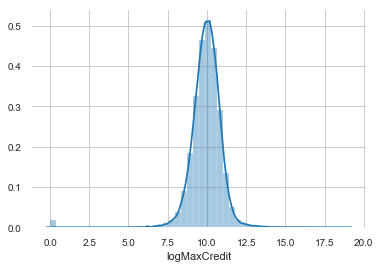

In [47]:
# logMaxCredit: replace with the median
loan["logMaxCredit"] = loan["logMaxCredit"].transform(lambda x: x.fillna(x.median()))
seaborn.distplot(loan["logMaxCredit"])

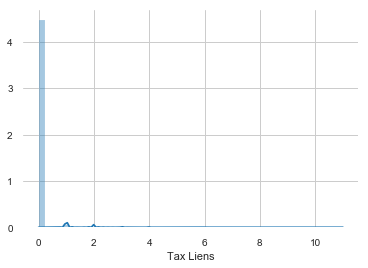

In [48]:
# Tax Liens: replace with the median
loan["Tax Liens"] = loan["Tax Liens"].transform(lambda x: x.fillna(x.median()))
seaborn.distplot(loan["Tax Liens"])

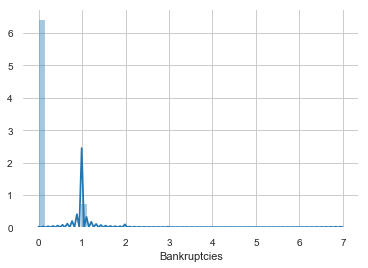

In [49]:
# Bankruptcies: replace with the median
loan["Bankruptcies"] = loan["Bankruptcies"].transform(lambda x: x.fillna(x.median()))
seaborn.distplot(loan["Bankruptcies"])

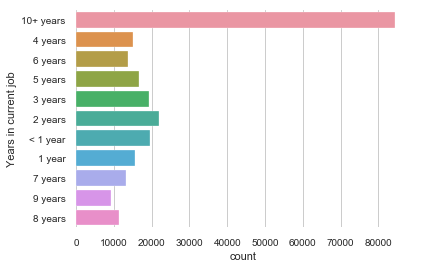

In [50]:
# Years in current job: replace with the most frequent category: '10+ years'
loan["Years in current job"] = loan["Years in current job"].transform(lambda x: x.fillna('10+ years'))
seaborn.countplot(y=loan["Years in current job"])

/Users/cloris1022/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


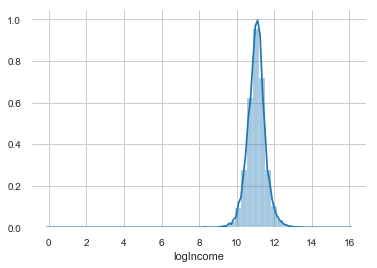

In [51]:
# logIncome: Fill in missing values using linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data = loan[['logMthDebt', 'logCreditBalance', 'logMaxCredit', 'logIncome']]
#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
missing_logIncome_X_train = data[data['logIncome'].notnull()].drop(columns='logIncome')
missing_logIncome_y_train = data[data['logIncome'].notnull()]['logIncome']
missing_logIncome_X_test = data[data['logIncome'].isnull()].drop(columns='logIncome')
missing_logIncome_y_test = data[data['logIncome'].isnull()]['logIncome']
#Step-2: Train the machine learning algorithm
linreg.fit(missing_logIncome_X_train, missing_logIncome_y_train)
#Step-3: Predict the missing values in the attribute of the test data.
pred_logIncome = linreg.predict(missing_logIncome_X_test)
#Step-4: Let’s obtain the complete dataset by combining with the target attribute.
loan.logIncome[loan.logIncome.isnull()] = pred_logIncome

seaborn.distplot(loan.logIncome)

/Users/cloris1022/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


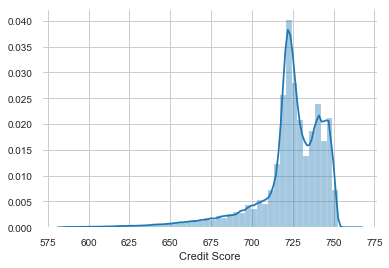

In [52]:
# Credit Score: Fill in missing values using linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data1 = loan[['Years of Credit History', 'Number of Credit Problems', 'logMthDebt', 'logMaxCredit', 'Credit Score']]
#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
missing_CredScore_X_train = data1[data1['Credit Score'].notnull()].drop(columns='Credit Score')
missing_CredScore_y_train = data1[data1['Credit Score'].notnull()]['Credit Score']
missing_CredScore_X_test = data1[data1['Credit Score'].isnull()].drop(columns='Credit Score')
missing_CredScore_y_test = data1[data1['Credit Score'].isnull()]['Credit Score']
#Step-2: Train the machine learning algorithm
linreg.fit(missing_CredScore_X_train, missing_CredScore_y_train)
#Step-3: Predict the missing values in the attribute of the test data.
pred_CredScore = linreg.predict(missing_CredScore_X_test)
#Step-4: Let’s obtain the complete dataset by combining with the target attribute.
loan['Credit Score'][loan['Credit Score'].isnull()] = pred_CredScore

seaborn.distplot(loan['Credit Score'])

In [53]:
# Months since last delinquent: so many missing values and little related to the target, can be removed 
loan.drop("Months since last delinquent",axis=1,inplace=True)

In [54]:
loan.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Purpose                      0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Bankruptcies                 0
Tax Liens                    0
logLoanAmount                0
logIncome                    0
logMthDebt                   0
logCreditBalance             0
logMaxCredit                 0
dtype: int64

#### 4.1.4 Get dummies for categorical variables

In [55]:
# Get dummies for the categorical variables
loandata = pd.get_dummies(loan.drop(columns=['Loan ID','Customer ID'], axis=1), drop_first = True)
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240373 entries, 0 to 256983
Data columns (total 33 columns):
Loan Status                       240373 non-null int64
Credit Score                      240373 non-null float64
Years of Credit History           240373 non-null float64
Number of Open Accounts           240373 non-null int64
Number of Credit Problems         240373 non-null int64
Bankruptcies                      240373 non-null float64
Tax Liens                         240373 non-null float64
logLoanAmount                     240373 non-null float64
logIncome                         240373 non-null float64
logMthDebt                        240373 non-null float64
logCreditBalance                  240373 non-null float64
logMaxCredit                      240373 non-null float64
Term_Short Term                   240373 non-null uint8
Years in current job_10+ years    240373 non-null uint8
Years in current job_2 years      240373 non-null uint8
Years in current job_3 years   

In [56]:
# Rename the column name with '<' to avoid the XGBoost error:
loandata.rename(columns={'Years in current job_< 1 year': 'Years in current job_less 1 year'}, inplace=True)

### 4.2 Feature Selection

In [57]:
# Define training data and target variable - Loan Status
train_data = loandata.drop(columns = ['Loan Status'],axis=1)
target = loandata['Loan Status']
train_data.shape, target.shape

((240373, 32), (240373,))

In [58]:
# Use random forest classifier for feature selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=25, n_estimators=100)
rfc.fit(train_data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

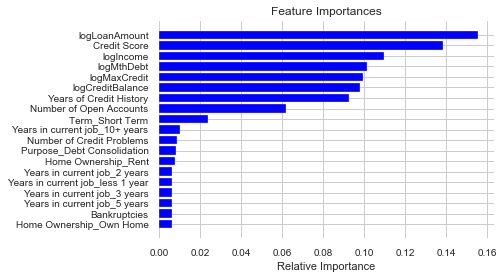

In [59]:
# Look at the top most important features
features = train_data.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[-19:]  # top 20 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 5. Predictive Modeling

### 5.1 Split training and testing sets

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((192298, 32), (48075, 32), (192298,), (48075,))

### 5.2 Train model and Algorithm selection

In [61]:
# Import the Classification modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [62]:
# Name the models to be used:
algorithms = [RandomForestClassifier(n_estimators=100), ExtraTreesClassifier(n_estimators=100), 
              GradientBoostingClassifier(n_estimators=100), XGBClassifier(n_estimators=100), 
              KNeighborsClassifier(), LogisticRegression(solver='lbfgs'), 
              GaussianNB(), BernoulliNB()]
names = ['RFC', 'ETC', 'GBC', 'XGB', 'KNN', 'LoR', 'GNB', 'BNB']

In [63]:
# Use K-fold cross validation:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)

RFC Mean: 0.7918439129827083 ; Std Dev: 0.0035939949181638866
ETC Mean: 0.8051461967784725 ; Std Dev: 0.002929370659266963
GBC Mean: 0.7554004827449136 ; Std Dev: 0.002903462473764895
XGB Mean: 0.7529095563364905 ; Std Dev: 0.0027107384386960277
KNN Mean: 0.712758309235097 ; Std Dev: 0.0016128836295019248


/Users/cloris1022/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/cloris1022/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/cloris1022/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/cloris1022/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/cloris1022/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. 

LoR Mean: 0.7333981629266992 ; Std Dev: 0.003053783027715795
GNB Mean: 0.565117646948266 ; Std Dev: 0.006335824634415772
BNB Mean: 0.7332993708734022 ; Std Dev: 0.0030686991388406315


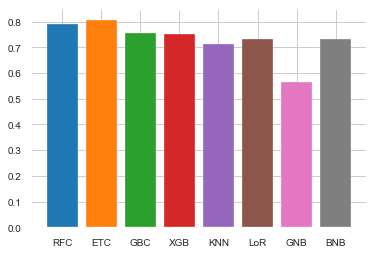

In [64]:
for model, name in zip(algorithms, names):
    cv_results = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)
    print(name, "Mean:", cv_results.mean(), "; Std Dev:", cv_results.std())
    plt.bar(name, cv_results.mean())

From the above, the ETC and RFC perform better.

### 5.3 Model/Parameter Tuning

In [65]:
ExtraTreesClassifier().get_params()

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.3.1 Randomized Search Cross Validation

In [66]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in extra trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 32, 55, 77, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [67]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
etc = ExtraTreesClassifier(n_estimators = 10, random_state = 25)
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
etc_random = RandomizedSearchCV(estimator = etc, param_distributions = random_grid, n_iter = 10, scoring='roc_auc', 
                                cv = 3, verbose=2, random_state=25, n_jobs = -1)
# Fit the random search model
etc_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 120.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=25, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 32, 55, 77, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

In [68]:
# View the best parameters from fitting the random search
etc_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 55,
 'bootstrap': False}

#### 5.4.2 Grid Search Cross Validation

In [69]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search.
param_grid = {
    'n_estimators': [100, 200],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'max_depth': [50, 60, 70],
    'bootstrap': [False]
}
# Create a based model
etc = ExtraTreesClassifier(n_estimators = 10, random_state = 25)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = etc, param_grid = param_grid, scoring='roc_auc', 
                           cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 29.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=25, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2], 'max_features': ['sqrt'], 'max_depth': [50, 60, 70], 'bootstrap': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [71]:
# View the best parameters from fitting the grid search
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

## 6. Testing and Evaluation

### 6.1 Evaluation from Model Tuning

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

In [73]:
# Base model
base_model = ExtraTreesClassifier(n_estimators = 10, random_state = 25)
base_model.fit(X_train, y_train)
# Apply the algorithm on the test data
y_pred_base = base_model.predict(X_test)
y_pred_base

array([0, 1, 1, ..., 0, 1, 1])

In [74]:
# Model from randomized search
best_random = etc_random.best_estimator_
best_random.fit(X_train, y_train)
# Apply the algorithm on the test data
y_pred_rand = best_random.predict(X_test)
y_pred_rand

array([0, 1, 1, ..., 1, 1, 1])

In [75]:
# Model from grid search
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
# Apply the algorithm on the test data
y_pred_grid = best_grid.predict(X_test)
y_pred_grid

array([0, 1, 1, ..., 1, 1, 1])

### 6.2 View metrics for model performance

#### 6.2.1 Scores and Confusion matrix

In [76]:
# Base model
print('Base model')
print('Accuracy score: ', accuracy_score(y_test, y_pred_base))
print('Precision score: ', precision_score(y_test, y_pred_base))
print('Recall score: ', recall_score(y_test, y_pred_base))
print('F1 score: ', f1_score(y_test, y_pred_base))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_base)) 
print('Classification report: ')
print(classification_report(y_test, y_pred_base))

Base model
Accuracy score:  0.7821944877795112
Precision score:  0.8393685655456418
Recall score:  0.8687276240268228
F1 score:  0.8537957804493221
Confusion Matrix: 
[[ 7030  5851]
 [ 4620 30574]]
Classification report: 
              precision    recall  f1-score   support

           0       0.60      0.55      0.57     12881
           1       0.84      0.87      0.85     35194

   micro avg       0.78      0.78      0.78     48075
   macro avg       0.72      0.71      0.71     48075
weighted avg       0.78      0.78      0.78     48075



In [77]:
# Model from randomized search
print('Base model')
print('Accuracy score: ', accuracy_score(y_test, y_pred_rand))
print('Precision score: ', precision_score(y_test, y_pred_rand))
print('Recall score: ', recall_score(y_test, y_pred_rand))
print('F1 score: ', f1_score(y_test, y_pred_rand))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_rand)) 
print('Classification report: ')
print(classification_report(y_test, y_pred_rand))

Base model
Accuracy score:  0.8191575663026521
Precision score:  0.8303745075549793
Recall score:  0.946269250440416
F1 score:  0.8845418326693227
Confusion Matrix: 
[[ 6078  6803]
 [ 1891 33303]]
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.47      0.58     12881
           1       0.83      0.95      0.88     35194

   micro avg       0.82      0.82      0.82     48075
   macro avg       0.80      0.71      0.73     48075
weighted avg       0.81      0.82      0.80     48075



In [78]:
# Model from grid search
print('Base model')
print('Accuracy score: ', accuracy_score(y_test, y_pred_grid))
print('Precision score: ', precision_score(y_test, y_pred_grid))
print('Recall score: ', recall_score(y_test, y_pred_grid))
print('F1 score: ', f1_score(y_test, y_pred_grid))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_grid)) 
print('Classification report: ')
print(classification_report(y_test, y_pred_grid))

Base model
Accuracy score:  0.8239209568382735
Precision score:  0.8315677177661448
Recall score:  0.9523782462919815
F1 score:  0.8878822797049044
Confusion Matrix: 
[[ 6092  6789]
 [ 1676 33518]]
Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.47      0.59     12881
           1       0.83      0.95      0.89     35194

   micro avg       0.82      0.82      0.82     48075
   macro avg       0.81      0.71      0.74     48075
weighted avg       0.82      0.82      0.81     48075



#### 6.2.2 ROC_AUC Curve

In [79]:
y_pred_prob1 = base_model.predict_proba(X_test)
y_pred_prob2 = best_random.predict_proba(X_test)
y_pred_prob3 = best_grid.predict_proba(X_test)
probs1 = y_pred_prob1[:,1]
probs2 = y_pred_prob2[:,1]
probs3 = y_pred_prob3[:,1]

In [80]:
from sklearn.metrics import roc_auc_score

print('ROC_AUC Score for')
print('Base model: ', roc_auc_score(y_test, probs1))
print('model from RandomSearch: ', roc_auc_score(y_test, probs2))
print('model from GridSearch: ', roc_auc_score(y_test, probs3))

ROC_AUC Score for
Base model:  0.8055978556239232
model from RandomSearch:  0.8489618636826717
model from GridSearch:  0.8553386466912334


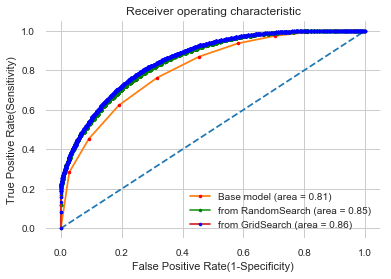

In [81]:
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, thresholds1 = roc_curve(y_test, probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, probs3)

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.', markerfacecolor='r',label='Base model (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, marker='.', markerfacecolor='g',label='from RandomSearch (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, marker='.', markerfacecolor='b',label='from GridSearch (area = %0.2f)' % roc_auc3)

plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

From the above metrics, I will choose the model from grid search.

## 7. Deployment

In [82]:
results = pd.DataFrame({
    'Actual loan status': y_test,
    'Predicted loan status': y_pred_grid,
    'prediction_probability_0': y_pred_prob3[:,0],
    'prediction_probability_1': y_pred_prob3[:,1],
    }, columns=['Actual loan status', 'Predicted loan status', 'prediction_probability_0',
               'prediction_probability_1'])

results

,Actual loan status,Predicted loan status,prediction_probability_0,prediction_probability_1
58682,0,0,0.630000,0.370000
212205,1,1,0.230000,0.770000
39437,1,1,0.175000,0.825000
43275,1,1,0.280000,0.720000
24232,1,1,0.140000,0.860000
148481,1,1,0.460000,0.540000
253454,1,1,0.035000,0.965000
44284,0,0,0.977105,0.022895
236489,1,1,0.221333,0.778667
112923,1,1,0.422143,0.577857
